## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# Sigmoid Function
from scipy.special import expit

## Neural Network Architecture

In [2]:
class NeuralNetwork:

  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    self.learning_rate = learning_rate
    self.activation_function = lambda x: expit(x)

    # Link weight matrices, weights between input and hidden layer, weights between hidden and output layer
    self.w_input_hidden = np.random.normal(0.0, pow(self.hidden_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
    self.w_hidden_output = np.random.normal(0.0, pow(self.output_nodes, -0.5), (self.output_nodes, self.hidden_nodes))

  def train(self, inputs_list, targets_list):
    # Forward Propagation
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T

    hidden_layer_inputs = np.dot(self.w_input_hidden, inputs)
    hidden_layer_outputs = self.activation_function(hidden_layer_inputs)

    final_layer_inputs = np.dot(self.w_hidden_output, hidden_layer_outputs)
    final_layer_outputs = self.activation_function(final_layer_inputs)

    # Error Calculation
    output_errors = targets - final_layer_outputs
    hidden_errors = np.dot(self.w_hidden_output.T, output_errors)

    # Update the weights between hidden layer and output layer
    self.w_hidden_output += self.learning_rate * np.dot((output_errors * final_layer_outputs * (1.0 - final_layer_outputs)), np.transpose(hidden_layer_outputs))

    # Update the weights between hidden layer and output layer
    self.w_input_hidden += self.learning_rate * np.dot((hidden_errors * hidden_layer_outputs * (1.0 - hidden_layer_outputs)), np.transpose(inputs))

  def query(self, inputs_list):
    # Forward Propagation
    inputs = np.array(inputs_list, ndmin=2).T

    hidden_layer_inputs = np.dot(self.w_input_hidden, inputs)
    hidden_layer_outputs = self.activation_function(hidden_layer_inputs)

    final_layer_inputs = np.dot(self.w_hidden_output, hidden_layer_outputs)
    final_layer_outputs = self.activation_function(final_layer_inputs)

    return final_layer_outputs

## MNIST Project

In [3]:
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

### Data Visualization

In [4]:
def array_to_image(index):
    row = train_data.iloc[index].to_numpy()
    label = row[0]  
    array = row[1:]
    image_array = array.reshape(28, 28)
    plt.imshow(image_array, cmap="Greys", interpolation='none')
    plt.title(f"Label: {label}")
    plt.show()

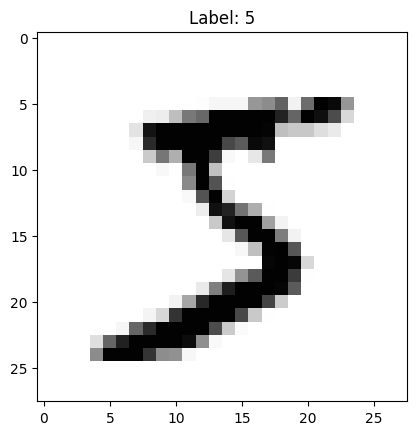

In [5]:
array_to_image(0)

### Split dataset into the train and the test set

In [6]:
X_train = train_data.drop(["label"], axis=1).to_numpy()
y_train = train_data["label"].to_numpy()

X_test = test_data.drop(["label"], axis=1).to_numpy()
y_test = test_data["label"].to_numpy()

### Feature Scaling

In [7]:
# All values should be between 0.01 and 1.0
X_train = (X_train / 255) * 0.99 + 0.01
X_test = (X_test / 255) * 0.99 + 0.01

### Train the ANN

In [8]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.1

# Create an instance of neural network
nn = NeuralNetwork(
    input_nodes,
    hidden_nodes,
    output_nodes,
    learning_rate
)

In [9]:
for epoch in range(10):
    for i in range(len(X_train)):
        inputs = X_train[i]
        # Create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        targets[y_train[i]] = 0.99
        nn.train(inputs, targets)

### Test the network

In [10]:
def test_the_network(index):
    real_answer = y_test[index]
    print(f"The real answer is: {real_answer}")

    outputs = nn.query(X_test[index])
    predicted_answer = np.argmax(outputs)
    print(f"The predicted answer is: {predicted_answer}")

In [11]:
test_the_network(0)

The real answer is: 7
The predicted answer is: 7


### Evaluate the network

In [12]:
scorecard = []

for i in range(len(X_test)):
    real_answer = y_test[i]
    
    outputs = nn.query(X_test[i])
    predicted_answer = np.argmax(outputs)

    if real_answer == predicted_answer:
        scorecard.append(1)
    else:
        scorecard.append(0)

In [13]:
accuracy = (sum(scorecard) / len(scorecard)) * 100
print(f"Accuracy of neural network: {accuracy} %")

Accuracy of neural network: 96.87 %
